# Turismo de Portugal em Gráficos  com seaborn


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
filename = 'pordata1.xls'
class ScalarFormatterClass(ScalarFormatter):
   def _set_format(self):
      self.format = "%1.2f"




Com os dados do ficheiro pordata1.xls, usando a interface orientada a objetos do 
Seaborn, obtenha os seguintes gráficos: 
1. Gráfico da evolução ao longo dos anos nas regiões NUTS III da média e máximo 
do valor total. 


C:\Users\moham\AppData\Local\Temp\ipykernel_1228\1050163704.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pordata_temp.loc['Média',:] = pordata_temp.iloc[1:,:].mean()
C:\Users\moham\AppData\Local\Temp\ipykernel_1228\1050163704.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pordata_temp.loc['Média',:] = pordata_temp.iloc[1:,:].mean()
C:\Users\moham\AppData\Local\Temp\ipykernel_1228\1050163704.py:5: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=Non

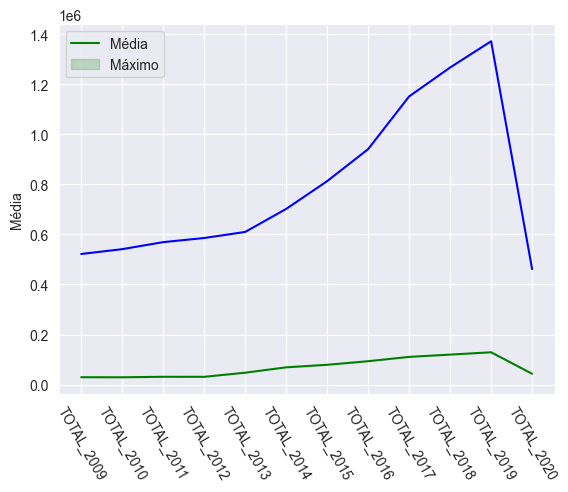

In [106]:
pordata = pd.read_excel(io=filename,index_col='Âmbito Geográfico',skiprows=[0])
fig, ax = plt.subplots(1)
pordata_temp = pordata.loc['NUTS III']
pordata_temp.loc['Média',:] = pordata_temp.iloc[1:,:].mean()
pordata_temp.loc['Máximo',:] = pordata_temp.iloc[1:,:].max() 
pordata_total= pordata_temp.iloc[:,0:13].transpose()
pordata_total
fig =sns.lineplot(data=pordata_total,x=pordata_total.index,y='Média', ax=ax,color='g')
fig.set_xticklabels(fig.get_xticklabels(), rotation=-60)
fig =sns.lineplot(data=pordata_total,x=pordata_total.index,y='Máximo', ax=ax,color='b')
ax.legend(['Média','Máximo'])
plt.subplots_adjust(hspace=0.8)


Gráfico da evolução ao longo dos anos dos valores mínimo, médio e máximo do 
valor total de um dado Âmbito Geográfico (ex: Município). Desenvolva uma 
função que tenha como parâmetros uma DataFrame e uma string com o Âmbito 
Geográfico. Teste a função criando gráficos para NUTS I, NUTS II, NUT III e 
Munícipio. 

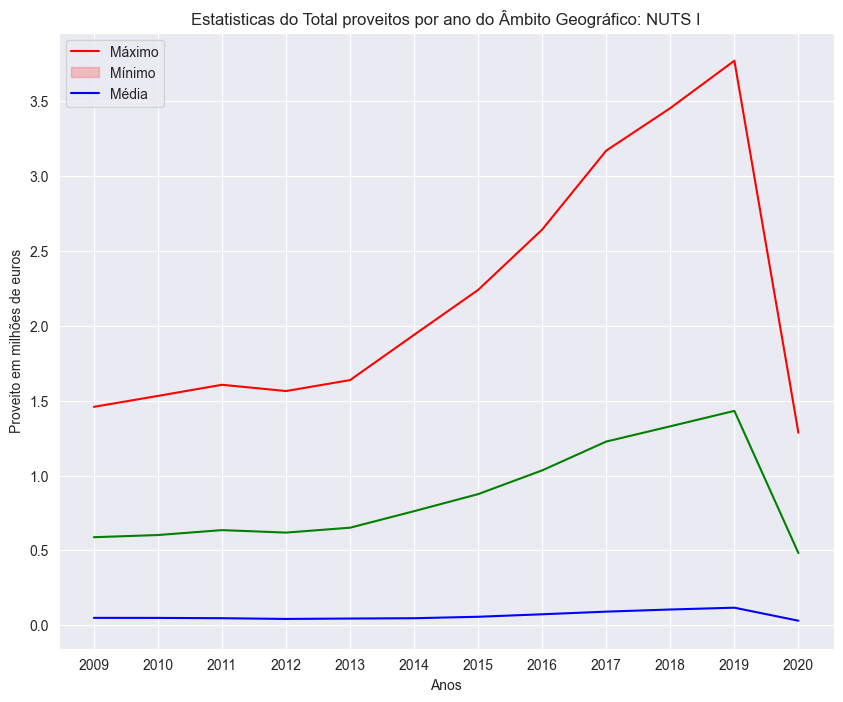

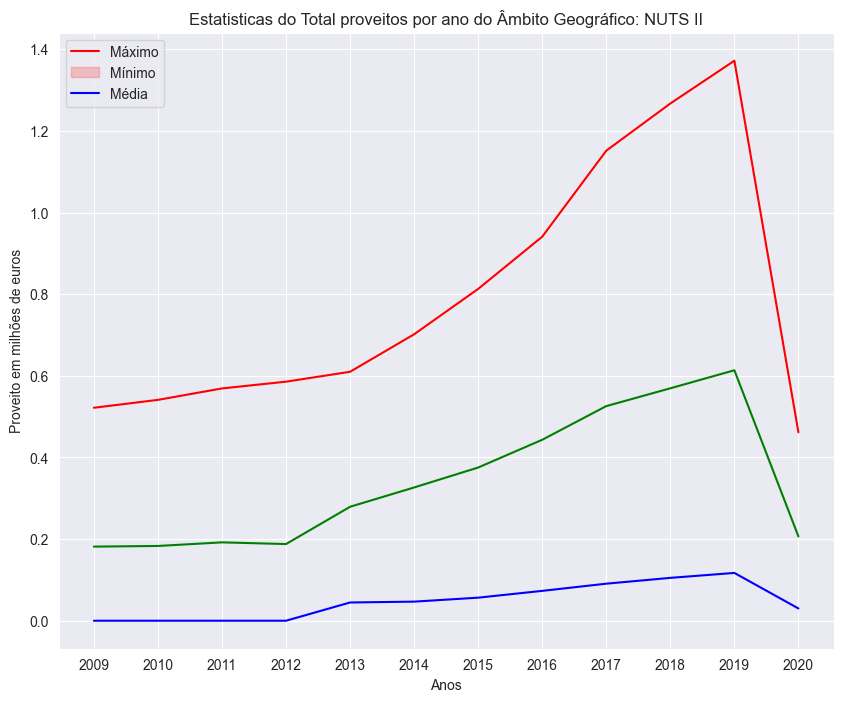

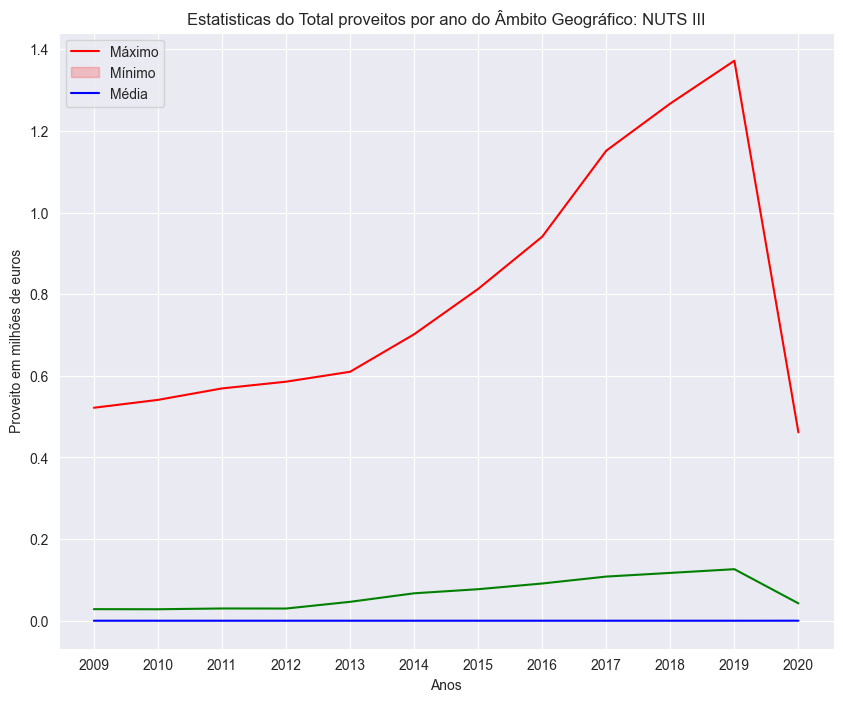

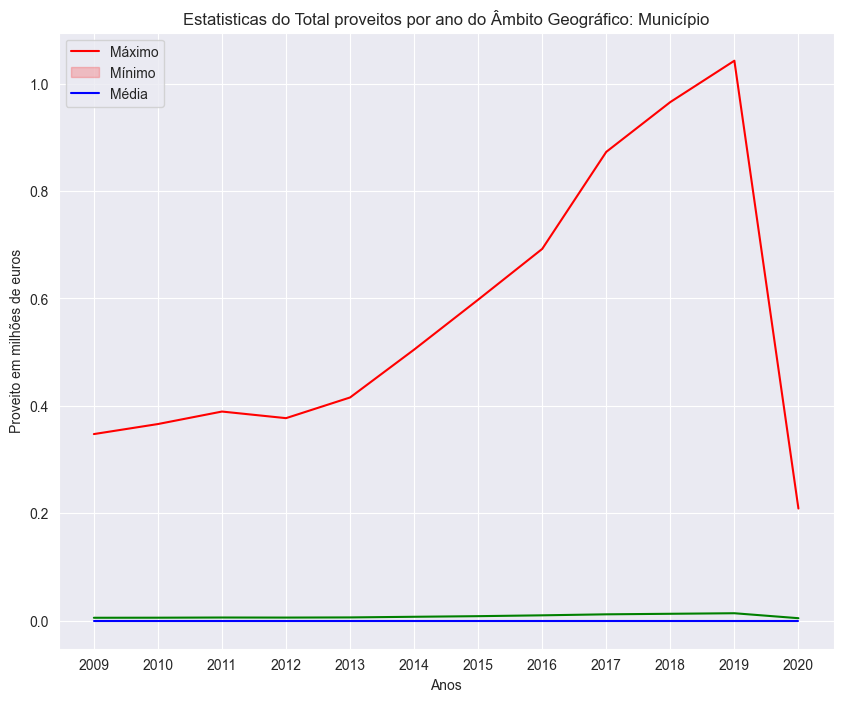

In [50]:
def stsgraph1(ag,pordata):
    sns.set_style('darkgrid')
    pordata_temp = pordata.loc[ag]
    x = list(str(i) for i in range(2009,pordata.columns[1:13].__len__()+2009))
    y_min=[]
    y_max=[]
    y_mean=[]
    for i in pordata.columns[1:]:
        y_max.append(pordata_temp[i].max() / 1e+6)
        y_min.append(pordata_temp[i].min() / 1e+6)
        y_mean.append(pordata_temp[i].mean() / 1e+6)
    fig, ax1 = plt.subplots()
    fig.set_size_inches(10,8)
    ax1.set_title('Estatisticas do Total proveitos por ano do Âmbito Geográfico: '+ag)
    sns.lineplot(x=x,y=y_max[0:12],color='r',ax=ax1)
    sns.lineplot(x=x,y=y_min[0:12],color='b',ax=ax1)
    sns.lineplot(x=x,y=y_mean[0:12],color='g',ax=ax1)
    ax1.legend(labels=['Máximo','Mínimo','Média'])

    ax1.set_xlabel('Anos')
    ax1.set_ylabel('Proveito em milhões de euros')
    fig.savefig('images/ex2_seab'+ag+'.svg',format='SVG')

    
stsgraph1('NUTS I',pordata)
stsgraph1('NUTS II',pordata)
stsgraph1('NUTS III',pordata)
stsgraph1('Município',pordata)

Histogramas dos valores apenas dos Hotéis para dois anos indicados como 
parâmetros considerando os dados para um determinado âmbito geográfico (ex: 
NUTS III). A função a desenvolver deve ter ainda como parâmetro o “Âmbito 
Geográfico”, com o valor por defeito “NUTS III”. Os 2 histogramas devem ficar 
lado a lado. 


                   HOTEIS_2009  HOTEIS_2013
Âmbito Geográfico                          
NUTS III                 14187        15951
NUTS III                  8644         8300
NUTS III                 10500        10117
NUTS III                 27001        23126
NUTS III                 18355        22808
NUTS III                  4353         5287
NUTS III                 15003        17211
NUTS III                278835       326154
NUTS III                140924       163228
NUTS III                 11387        13427


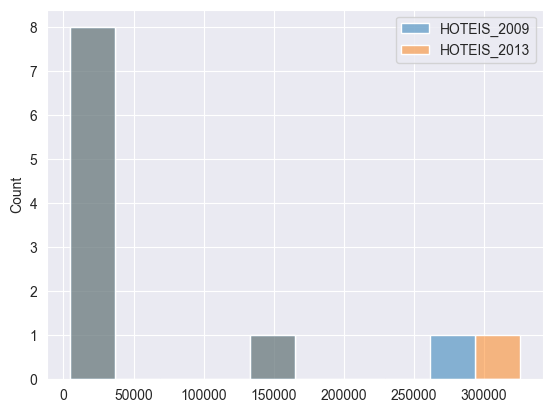

In [166]:
def stsHotel_years(year_1,year_2,ag='NUTS III'):
    fig, axs = plt.subplots(1)
    y1 = ('HOTEIS_'+str(year_1))
    y2 = ('HOTEIS_'+str(year_2))
    data1 = pordata.loc[ag,[y1,y2]]
    data1 = data1[(data1 >4000).all(1)]
    g =sns.histplot(data=data1,ax=axs,bins=10)
    
    #sns.histplot(data=data ,weights=y2,color='r' ,ax=axs,bins=10)
    #sns.histplot(data=data2,y='Região',color='r',weights=y2 ,ax=axs)
    #axs.set_xlabel('Proveito em euros')
    #axs.set_xticklabels(axs.get_xticklabels(), rotation=-30)

    fig.subplots_adjust(wspace=1.8)
    print(data1[(data1 >4000).all(1)])
stsHotel_years(2009,2013)

Boxplots dos valores totais das regiões NUTS II. 


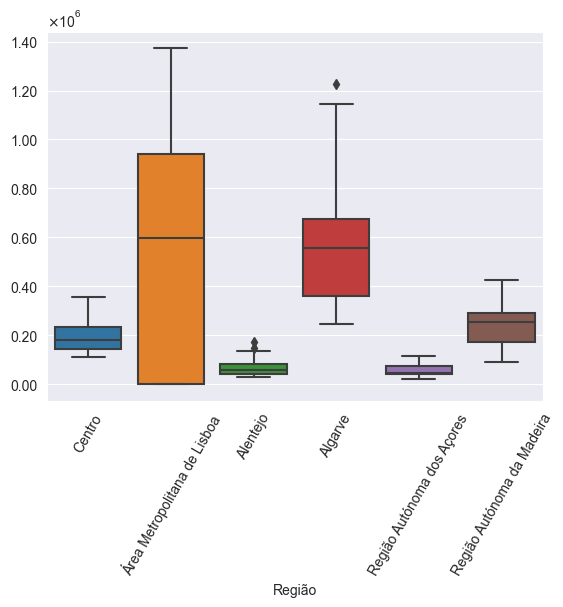

In [52]:

fig, axs = plt.subplots(1)

data3 = pordata.loc['NUTS II'].reset_index().iloc[1:,1:].transpose()
data3.columns = data3.iloc[0,:]
data3 = data3.iloc[1:,:]
axs = sns.boxplot(data=data3,ax=axs)
axs.set_xticklabels(axs.get_xticklabels(), rotation=60)
yScalarFormatter = ScalarFormatterClass(useMathText=True)
yScalarFormatter.set_powerlimits((0,0))
axs.yaxis.set_major_formatter(yScalarFormatter)
fig.savefig('images/ex_seab_boxplotNUTSII.svg',format='SVG')

Representação usando barras da mediana entre 2009 e 2020 para os 10 municípios com maiores 
proveitos totais no conjunto destes anos. 


,Região,TOTAL_2009,TOTAL_2010,TOTAL_2011,TOTAL_2012,TOTAL_2013,TOTAL_2014,TOTAL_2015,TOTAL_2016,TOTAL_2017,TOTAL_2018,TOTAL_2019,TOTAL_2020,Soma
Âmbito Geográfico,,,,,,,,,,,,,,
Município,Lisboa,347486,366163,389437,377133,415638,504761,597729,692260,872891,965632,1042581,208852,6780563
Município,Albufeira,206507,208138,222047,215707,212038,255146,275674,341192,394707,408129,434573,142554,3316412
Município,Funchal,178347,157768,176523,177522,193075,211413,231118,262905,283294,294386,279686,88154,2534191
Município,Loulé,106770,108420,106743,112944,126086,131830,141900,173373,184034,197580,222795,84041,1696516
Município,Porto,74245,84208,83851,85169,93594,111706,139524,174864,218536,252643,292135,62992,1673467
Município,Cascais,71135,78474,89069,84406,89526,97187,107823,117526,136901,141099,148110,37504,1198760
Município,Portimão,60792,58628,61608,65435,68918,79504,88613,108283,126307,135945,140400,52066,1046499
Município,Lagoa,40865,52640,57185,63274,66530,77559,89211,100681,115000,124686,130787,58393,976811
Município,Lagos,20760,25214,25750,31398,34229,38528,47766,56809,66969,74725,81760,30343,534251


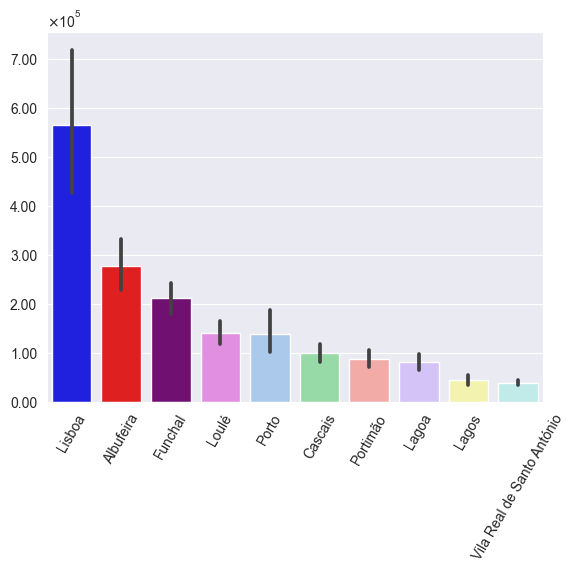

In [93]:
# filtrar e processar os dados
pordata_mun= pordata.loc['Município','Região':'TOTAL_2020']
pordata_mun_t = pordata_mun.loc[:,'TOTAL_2009':].sum(axis=1)
pordata_mun['Soma'] = pordata_mun_t
pordata_mun_10L = pordata_mun.nlargest(10,columns='Soma').iloc[:,:-1]
pordata_mun_10L = pd.DataFrame(pordata_mun_10L.values.transpose()[1:],columns=pordata_mun_10L.values.transpose()[0])
# plotar
fig, axs = plt.subplots(1)
colors=['blue','red','purple','violet','#a1c9f4', '#8de5a1', '#ff9f9b', '#d0bbff', '#fffea3', '#b9f2f0' ]
fig = sns.barplot(data=pordata_mun_10L, palette = sns.color_palette(colors),ax=axs)
fig.set_xticklabels(fig.get_xticklabels(), rotation=60)
yScalarFormatter = ScalarFormatterClass(useMathText=True)
yScalarFormatter.set_powerlimits((0,0))
axs.yaxis.set_major_formatter(yScalarFormatter)
pordata_mun10 = pordata_mun.nlargest(10,columns='Soma')
pordata_mun10

